In [1]:
import pandas as pd
import numpy as np
# import sklearn

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv("LongData.csv")

In [8]:
df.shape

(88736, 32)

In [9]:
df.head(1)

,Unnamed: 0,hhsize,A002_age,edu,gender1,region1,region3,C152,C056,C075,C083,C105,C107,C108,C144,bmi,smoke,iadl,mmse,mmseg,chronic_a,chronic_b,chronic_c,chronic_d,chronic_e,chronic_f,chronic_g,chronic_h,chronic_i,present_labor,alc,adl
0,0,1.0,73.0,2.0,5.0,11.0,1.0,4.0,1.0,4.0,2.0,60.0,152.0,5.0,1.0,25.969529,0.0,0.0,29.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,NaN,NaN


In [5]:
df_drop=df.dropna(axis=0)

<AxesSubplot:>

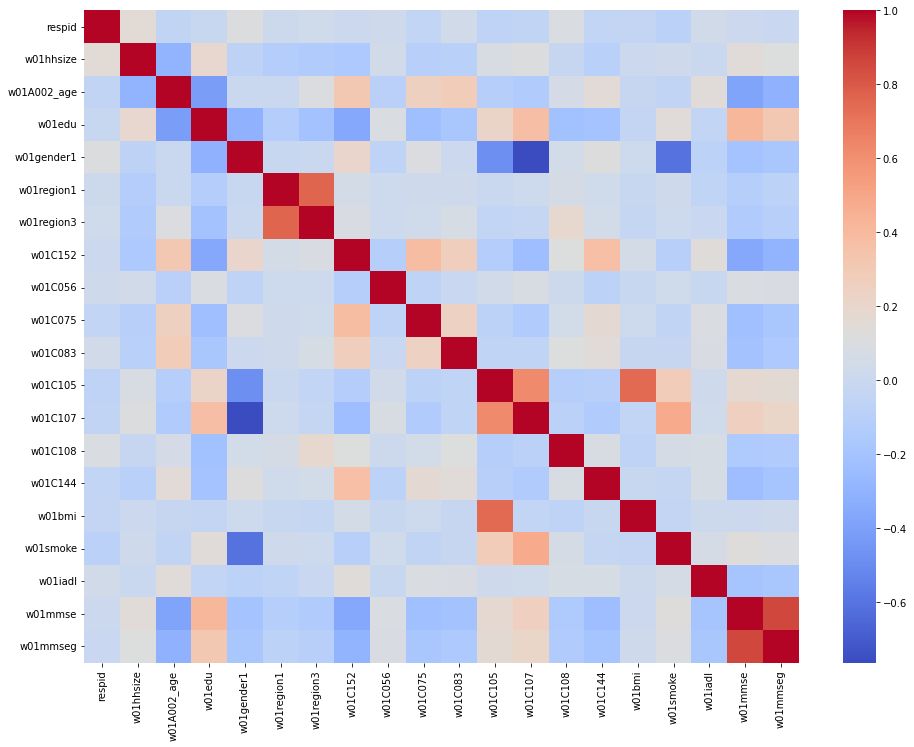

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(df_drop.iloc[:,:20].corr(),cmap='coolwarm')

In [6]:
X=df_drop.drop(['mmse','mmseg'],axis=1).iloc[:,1:]
y=df_drop['mmse']

In [9]:
df.iloc[:,:18].head()

,respid,w01hhsize,w01A002_age,w01edu,w01gender1,w01region1,w01region3,w01C152,w01C056,w01C075,w01C083,w01C105,w01C107,w01C108,w01C144,w01bmi,w01smoke,w01iadl
pid,,,,,,,,,,,,,,,,,,
11,1.0,1.0,73.0,2.0,5.0,11.0,1.0,4.0,1.0,4.0,2.0,60.0,152.0,5.0,1.0,25.969529,0.0,0.0
21,1.0,2.0,51.0,4.0,5.0,11.0,1.0,2.0,5.0,2.0,2.0,59.0,158.0,5.0,1.0,23.634033,0.0,0.0
22,2.0,2.0,52.0,4.0,1.0,11.0,1.0,2.0,5.0,2.0,2.0,72.0,168.0,1.0,1.0,25.510204,2.0,0.0
31,1.0,1.0,80.0,1.0,5.0,11.0,1.0,4.0,5.0,4.0,4.0,43.0,143.0,1.0,4.0,21.027923,0.0,7.0
41,1.0,2.0,70.0,1.0,5.0,11.0,1.0,4.0,5.0,4.0,3.0,50.0,157.0,1.0,1.0,20.284799,0.0,0.0


In [10]:
X,y = df.iloc[:,:18],df['mmse']

In [18]:
X=X.fillna(0)
y=y.fillna(0)

In [7]:
print(X.shape,y.shape)

(50085, 29) (50085,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(40068, 29) (40068,) (10017, 29) (10017,)


In [10]:
# LinearRegression Model

from sklearn.linear_model import LinearRegression

X_train

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

3.79985178051827

In [23]:
lin_reg.score(X_test,y_test)

0.7942158555958844

In [40]:
y_test

pid
49151    23.0
12062    27.0
49901    27.0
61442    26.0
31661    29.0
         ... 
2892     29.0
13051    19.0
28362    28.0
4483     25.0
60612    29.0
Name: w01mmse, Length: 2219, dtype: float64

In [32]:
type(y_test)

pandas.core.series.Series

In [38]:
pd.DataFrame(y_pred,y_test).head(30)

,0
w01mmse,
23.0,24.089202
27.0,27.473902
27.0,27.704487
26.0,24.773546
29.0,27.885633
0.0,1.200133
15.0,19.307680
21.0,23.332452
26.0,22.974510


In [39]:
lin_reg.intercept_,lin_reg.coef_

(1.2001334836522837,
 array([ 0.13247943,  0.36130412, -0.01135439,  0.55614423,  0.57953347,
        -0.01490859,  0.05419073, -0.21625466,  1.13236094,  0.18024394,
        -0.44147744,  0.19995171,  0.08509283, -0.09467747, -0.22172095,
        -0.35635265,  0.50174972, -1.04692256]))

In [11]:
# DecisionTree Regression Model

from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

5.095543174930334

In [12]:
# RandomForest Regression Model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

3.5185910365813338

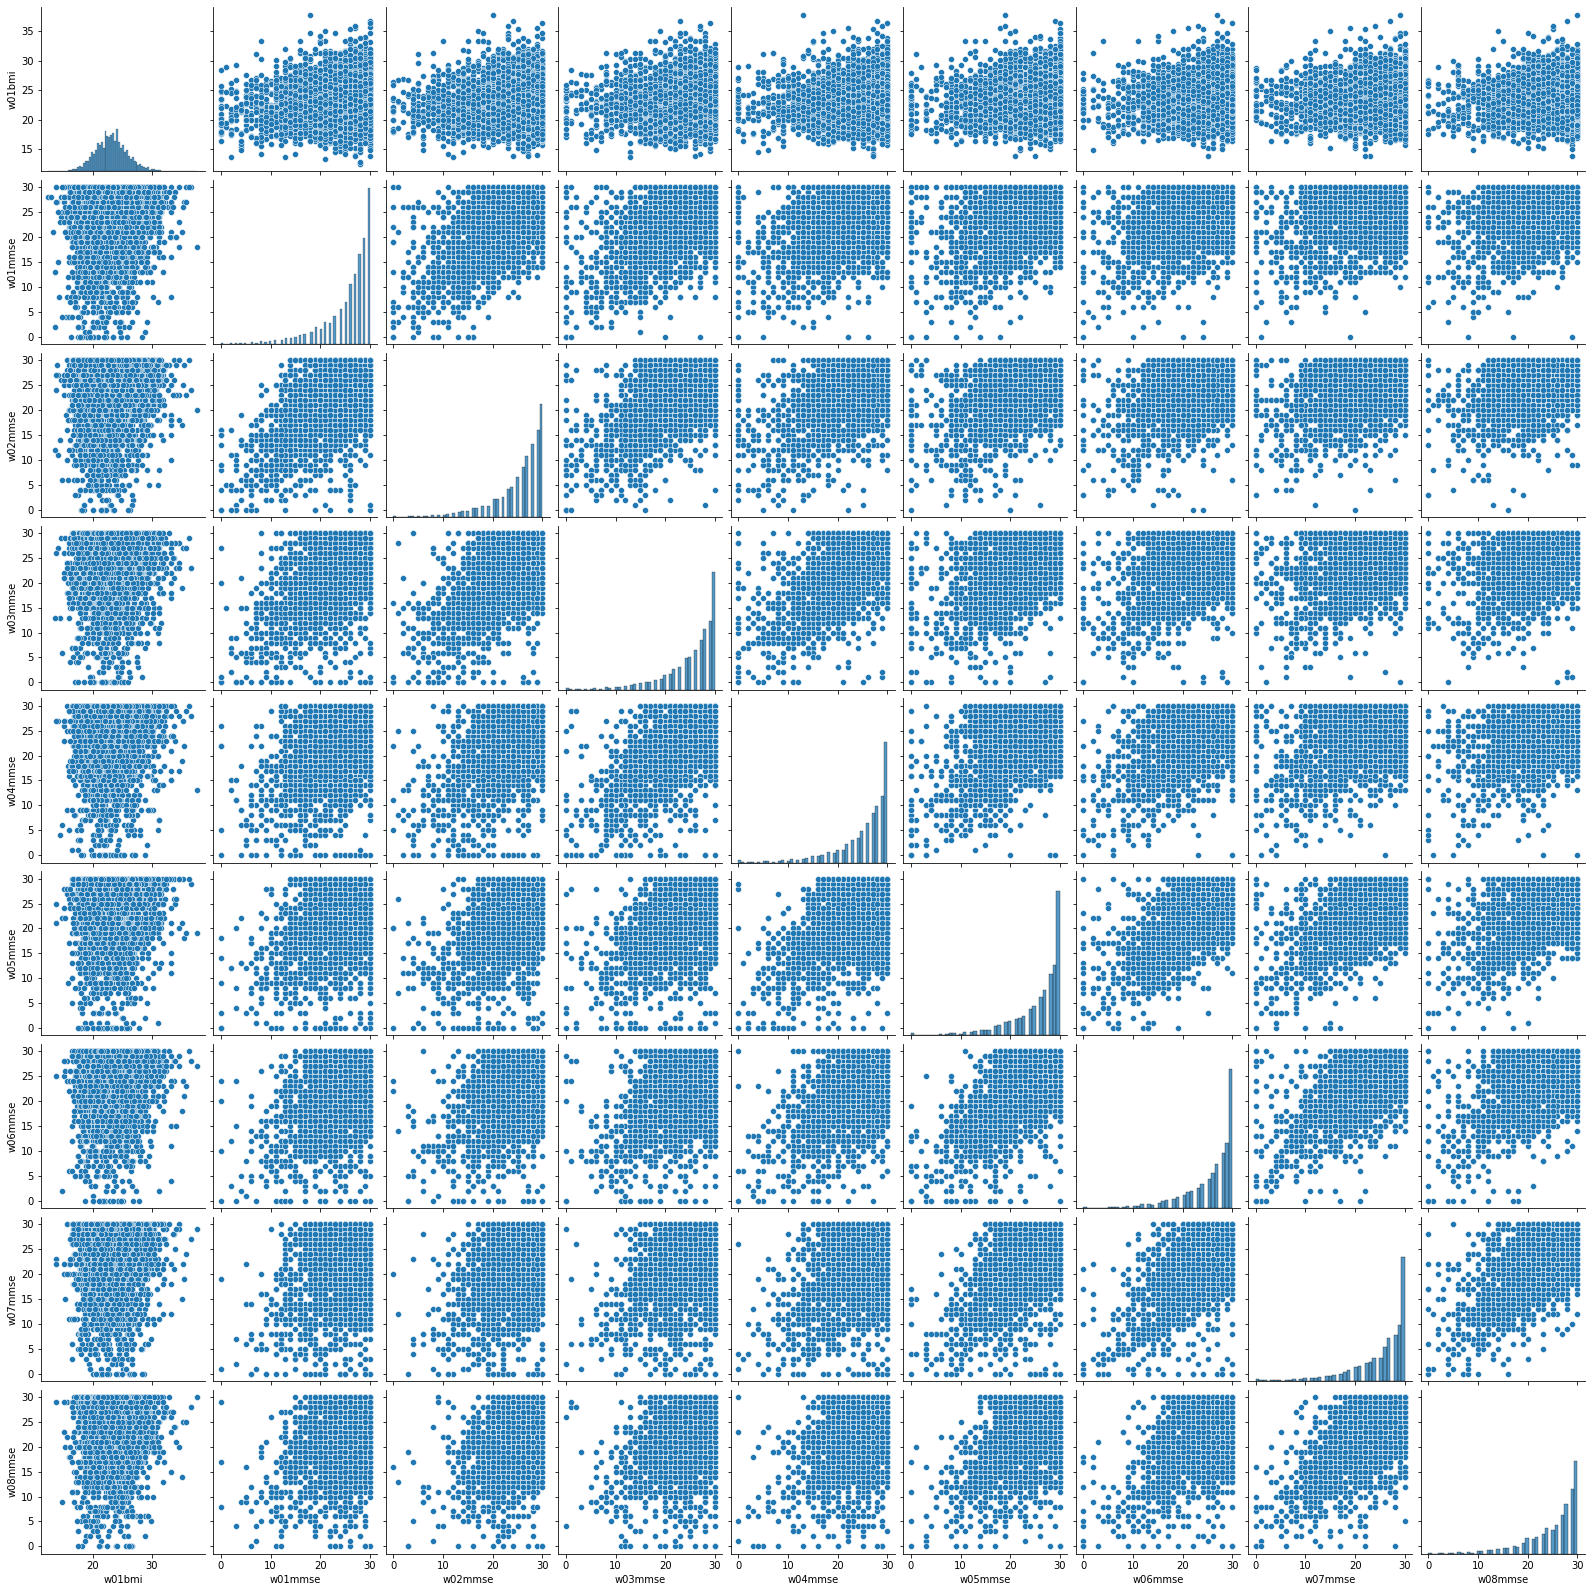

In [84]:
import seaborn as sns
sns.pairplot(df[['w01bmi','w01mmse','w02mmse','w03mmse','w04mmse','w05mmse','w06mmse','w07mmse','w08mmse']])

In [83]:
df['w08mmseg'].value_counts()

3.0    4389
2.0    1169
1.0     611
Name: w08mmseg, dtype: int64

In [86]:
!pip list

Package                   Version
------------------------- ------------
ansi2html                 1.8.0
appnope                   0.1.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
attrs                     21.4.0
backcall                  0.2.0
beautifulsoup4            4.11.1
bleach                    5.0.1
branca                    0.5.0
Brotli                    1.0.9
brotlipy                  0.7.0
bs4                       0.0.1
certifi                   2022.6.15
cffi                      1.15.1
charset-normalizer        2.1.0
click                     8.1.3
cryptography              37.0.1
cycler                    0.11.0
dash                      2.6.1
dash-bootstrap-components 1.2.1
dash-core-components      2.0.0
dash-html-components      2.0.0
dash-table                5.0.0
debugpy                   1.6.2
decorator                 5.1.1
defusedxml                0.7.1
entrypoints               0.4
et-xmlfile            